<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Neural Networks for Recognition - Assignment 3

     Instructor: Kris Kitani                       TAs: Qichen(Lead), Paritosh, Rawal, Yan, Zen, Wen-Hsuan

## Q5 Image Compression with Autoencoders [Extra Credit](25 points)

**Note: We would recommend finishing Question 7 (pytorch) before attempting this question**

**Please include all the write up answers below to theory.ipynb. For the questions need code, you need to include the screenshot of code to theory.ipynb to get points.**

An autoencoder is a neural network that is trained to attempt to copy its input to its output, but it usually allows copying only approximately. This is typically achieved by restricting the number of hidden nodes inside the autoencoder; in other words, the autoencoder would be forced to learn to \textit{represent} data with this limited number of hidden nodes. This is a useful way of learning compressed representations.
In this section, we will continue using the NIST36 dataset you have from the previous questions.

### Q5.1 Building the Autoencoder

#### Q5.1.1 (10 points Code)

Due to the difficulty in training auto-encoders, we have to move to the $relu(x) = max(x,0)$ activation function. It is provided for you in **q2.ipynb**. Implement a 2 hidden layer autoencoder where the layers are 
1. 1024 to 32 dimensions, followed by a ReLU
2. 32 to 32 dimensions, followed by a ReLU
3. 32 to 32 dimensions, followed by a ReLU
4. 32 to 1024 dimensions, followed by a sigmoid (this normalizes the image output for us)

The loss function that you're using is total squared error for the output image compared to the input image (they should be the same!).  

<font color="red">**Please include the screenshot of code to theory.ipynb**</font>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from ipynb.fs.defs.q2 import *
from collections import Counter

train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')

# we don't need labels now!
train_x = train_data['train_data']
valid_x = valid_data['valid_data']

max_iters = 150
# pick a batch size, initial learning rate
batch_size = 8
learning_rate = 1e-3
hidden_size = 32
lr_rate = 50

batches = get_random_batches(train_x,np.ones((train_x.shape[0],1)),batch_size)
batch_num = len(batches)

params = Counter()

np.random.seed(0)

# initialize layers here
initialize_weights(1024, hidden_size, params, 'layer1')
initialize_weights(hidden_size, hidden_size, params, 'layer2')
initialize_weights(hidden_size, hidden_size, params, 'layer3')
initialize_weights(hidden_size, 1024, params, 'output')



#### Q5.1.2 (5 points Autograder)

To help even more with convergence speed, we will implement [momentum](http://cs231n.github.io/neural-networks-3/#sgd). Now, instead of updating $W = W - \alpha \frac{\partial J}{\partial W}$, we will use the update rules $M_W = 0.9 M_W - \alpha \frac{\partial J}{\partial W}$ and $W = W + M_W$. To implement this, populate the parameters dictionary with zero-initialized momentum accumulators, one for each parameter. Then simply perform both update equations for every batch.

In [2]:
def momentum_update(w: np.ndarray, m_w: np.ndarray, grad_w: np.ndarray, alpha: float, momentum: float=0.9):
    '''
    Momentum update
    
    [input]
    * w -- parameters
    * m_w -- the momentum of the parameters
    * grad_x -- parameter gradients
    * alpha -- learning rate
    * momentum -- the momentum factor
    
    [output]
    * w -- updated parameters
    * m_w -- updated momentum of the parameters
    '''
    # YOUR CODE HERE
    m_w = momentum * m_w - alpha * grad_w
    w = w + m_w

    return w, m_w

### Q5.2 Training the Autoencoder (3 Points Code+WriteUp)
 
Using the provided default settings, train the network for 100 epochs. What do you observe in the plotted training loss curve as it progresses?


<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

itr: 00 	 loss: 88124.55
itr: 02 	 loss: 58663.20
itr: 04 	 loss: 53358.63
itr: 06 	 loss: 52693.82
itr: 08 	 loss: 52014.26
itr: 10 	 loss: 51038.90
itr: 12 	 loss: 50625.83
itr: 14 	 loss: 50811.76
itr: 16 	 loss: 50319.62
itr: 18 	 loss: 50033.32
itr: 20 	 loss: 49776.74
itr: 22 	 loss: 49461.15
itr: 24 	 loss: 49374.22
itr: 26 	 loss: 49273.12
itr: 28 	 loss: 48976.03
itr: 30 	 loss: 49017.11
itr: 32 	 loss: 48831.78
itr: 34 	 loss: 48741.35
itr: 36 	 loss: 48669.74
itr: 38 	 loss: 48458.96
itr: 40 	 loss: 48230.41
itr: 42 	 loss: 48241.86
itr: 44 	 loss: 48182.68
itr: 46 	 loss: 48280.13
itr: 48 	 loss: 47680.98
itr: 50 	 loss: 46798.69
itr: 52 	 loss: 46362.98
itr: 54 	 loss: 46576.66
itr: 56 	 loss: 46592.27
itr: 58 	 loss: 46521.28
itr: 60 	 loss: 46557.67
itr: 62 	 loss: 46499.75
itr: 64 	 loss: 46203.00
itr: 66 	 loss: 46324.24
itr: 68 	 loss: 46308.23
itr: 70 	 loss: 46209.18
itr: 72 	 loss: 46253.50
itr: 74 	 loss: 46126.29
itr: 76 	 loss: 46568.16
itr: 78 	 loss: 45948.45


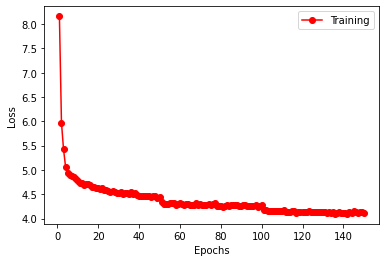

In [3]:
train_loss = []

# should look like your previous training loops
for itr in range(max_iters):
    total_loss = 0
    for xb,_ in batches:
        
        # https://datascience.stackexchange.com/a/19581
        
        a1 = forward(xb, params, 'layer1', relu)
        a2 = forward(a1, params, 'layer2', relu)
        a3 = forward(a2, params, 'layer3', relu)
        out = forward(a3, params, 'output', sigmoid)
        
        # loss
        total_loss += (np.mean(np.sum((xb - out) ** 2, axis=1)))
        
        delta1 = 2 * (out - xb) / xb.shape[0]
        delta2 = backwards(delta1, params, 'output', sigmoid_deriv)
        delta3 = backwards(delta2, params, 'layer3', relu_deriv)
        delta4 = backwards(delta3, params, 'layer2', relu_deriv)
        delta5 = backwards(delta4, params, 'layer1', relu_deriv)
        
        # apply gradient
#         params['W' + 'output'] -= (learning_rate * params['grad_W' + 'output'])
#         params['b' + 'output'] -= (learning_rate * params['grad_b' + 'output'])
#         params['W' + 'layer1'] -= (learning_rate * params['grad_W' + 'layer1'])
#         params['b' + 'layer1'] -= (learning_rate * params['grad_b' + 'layer1'])
#         params['W' + 'layer2'] -= (learning_rate * params['grad_W' + 'layer2'])
#         params['b' + 'layer2'] -= (learning_rate * params['grad_b' + 'layer2'])
#         params['W' + 'layer3'] -= (learning_rate * params['grad_W' + 'layer3'])
#         params['b' + 'layer3'] -= (learning_rate * params['grad_b' + 'layer3'])
        
        
        # apply gradient with momentum
        params['W' + 'output'], params['m_W' + 'output'] = momentum_update(params['W' + 'output'],
                                                                           params['m_W' + 'output'],
                                                                           params['grad_W' + 'output'],
                                                                           learning_rate)
        params['W' + 'layer1'], params['m_W' + 'layer1'] = momentum_update(params['W' + 'layer1'],
                                                                           params['m_W' + 'layer1'],
                                                                           params['grad_W' + 'layer1'],
                                                                           learning_rate)
        params['W' + 'layer2'], params['m_W' + 'layer2'] = momentum_update(params['W' + 'layer2'],
                                                                           params['m_W' + 'layer2'],
                                                                           params['grad_W' + 'layer2'],
                                                                           learning_rate)
        params['W' + 'layer3'], params['m_W' + 'layer3'] = momentum_update(params['W' + 'layer3'],
                                                                           params['m_W' + 'layer3'],
                                                                           params['grad_W' + 'layer3'],
                                                                           learning_rate)
        params['b' + 'output'], params['m_b' + 'output'] = momentum_update(params['b' + 'output'],
                                                                           params['m_b' + 'output'],
                                                                           params['grad_b' + 'output'],
                                                                           learning_rate)
        params['b' + 'layer1'], params['m_b' + 'layer1'] = momentum_update(params['b' + 'layer1'],
                                                                           params['m_b' + 'layer1'],
                                                                           params['grad_b' + 'layer1'],
                                                                           learning_rate)
        params['b' + 'layer2'], params['m_b' + 'layer2'] = momentum_update(params['b' + 'layer2'],
                                                                           params['m_b' + 'layer2'],
                                                                           params['grad_b' + 'layer2'],
                                                                           learning_rate)
        params['b' + 'layer3'], params['m_b' + 'layer3'] = momentum_update(params['b' + 'layer3'],
                                                                           params['m_b' + 'layer3'],
                                                                           params['grad_b' + 'layer3'],
                                                                           learning_rate)
        # training loop can be exactly the same as q2!
        # your loss is now squared error
        # delta is the d/dx of (x-y)^2
        # to implement momentum
        #   just use 'm_'+name variables
        #   to keep a saved value over timestamps
        #   params is a Counter(), which returns a 0 if an element is missing
        #   so you should be able to write your loop without any special conditions
    if itr % 2 == 0:
        print("itr: {:02d} \t loss: {:.2f}".format(itr,total_loss))
    if itr % lr_rate == lr_rate-1:
        learning_rate *= 0.9
    
    train_loss.append(total_loss)

train_loss = [loss / train_x.shape[0] for loss in train_loss]

plt.plot(list(range(1, max_iters + 1)), train_loss, 'ro-', label='Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Q5.3 Evaluating the Autoencoder

#### Q5.3.1(4 Points Code+WriteUp)
 
Now let’s evaluate how well the autoencoder has been trained.
 Select 5 classes from the total 36 classes in your dataset and for each selected class include in your report 2 validation images and their reconstruction. What differences do you observe that exist in the reconstructed validation images, compared to the original ones?


<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

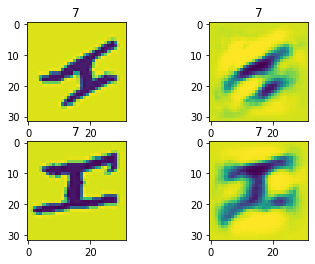

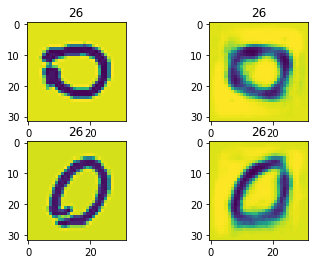

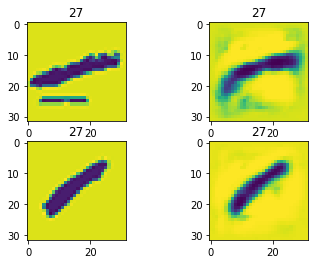

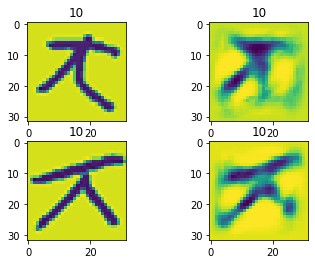

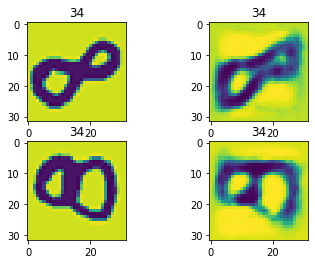

In [4]:
import matplotlib.pyplot as plt

classes = np.random.permutation(36)[:5]
valid_x = valid_data['valid_data']
valid_y = np.argmax(valid_data['valid_labels'], axis=1)

for i in range(len(classes)):
    image_idx = np.argwhere(valid_y == classes[i])[:2]
    fig, ax = plt.subplots(2, 2)
    
    a1 = forward(valid_x[image_idx[0]].reshape(1, -1), params, 'layer1', relu)
    a2 = forward(a1, params, 'layer2', relu)
    a3 = forward(a2, params, 'layer3', relu)
    out = forward(a3, params, 'output', sigmoid)
    
    ax[0][0].imshow(valid_x[image_idx[0]].reshape(32, 32))
    ax[0][0].set_title(str(classes[i]))    
    ax[0][1].imshow(out.reshape(32, 32))
    ax[0][1].set_title(str(classes[i]))
    
    a1 = forward(valid_x[image_idx[1]].reshape(1, -1), params, 'layer1', relu)
    a2 = forward(a1, params, 'layer2', relu)
    a3 = forward(a2, params, 'layer3', relu)
    out = forward(a3, params, 'output', sigmoid)
    
    ax[1][0].imshow(valid_x[image_idx[1]].reshape(32, 32))
    ax[1][0].set_title(str(classes[i]))
    ax[1][1].imshow(out.reshape(32, 32))
    ax[1][1].set_title(str(classes[i]))
    
    plt.show()

#### Q5.3.2 (3 Points Code+WriteUp)
 
Let’s evaluate the reconstruction quality using Peak Signal- to-noise Ratio (PSNR). PSNR is defined as
\begin{align}
\text{PSNR} = 20 \times \log_{10}(\text{MAX}_I) - 10\times \log_{10}(\text{MSE})
\end{align}
where $\text{MAX}_I$ is the maximum possible pixel value of the image, and $\text{MSE}$ (mean squared error) is computed across all pixels. You may use [skimage.measure.compare\_psnr](http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_psnr) for convenience. Report the average PSNR you get from the autoencoder across all validation images.

<font color="red">**Please include the write up answer to theory.ipynb**</font>

In [5]:
from skimage.metrics import peak_signal_noise_ratio as psnr
# evaluate PSNR

valid_x = valid_data['valid_data']

total_psnr = 0.

for i in range(valid_x.shape[0]):
    
    a1 = forward(valid_x[i].reshape(1, -1), params, 'layer1', relu)
    a2 = forward(a1, params, 'layer2', relu)
    a3 = forward(a2, params, 'layer3', relu)
    out = forward(a3, params, 'output', sigmoid)
    
    total_psnr += psnr(valid_x[i].reshape(1, -1), out.reshape(1, -1))

print('Mean PSNR - {}'.format(total_psnr / valid_x.shape[0]))

Mean PSNR - 15.063606382640828
